In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [10]:
Nt = 500
Nx = 60
Ny = 60

x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Nx)
t = np.linspace(0,10,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 0.3

lambda_ = deltat/(2*deltax)
mu_ = v*(deltat/((deltax)**2))

print(lambda_,mu_)

0.05911823647294605 0.20927855711422957


<ipython-input-7-7042d693dd9e>:18: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')


In [11]:
def ui(x,y):
    
    return 5*np.e**(-1*((x**2)+(y**2)))

In [12]:
u = np.zeros((Nt,Nx,Ny))
for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

In [16]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
            for i in range(1,len(x)-1):
                for j in range(1,len(y)-1):
                    u[l,i,j] = u[l-1,i,j] - \
                               lambda_ * u[l-1,i,j] * (u[l-1,i+1,j] - u[l-1,i,j] + u[l-1,i,j+1] - u[l-1,i,j]) \
                               + mu_ * (u[l-1,i+1,j] - 2*u[l-1,i,j] + u[l-1,i-1,j] +
                                        u[l-1,i,j+1] - 2*u[l-1,i,j] + u[l-1,i,j-1])

In [17]:
GetSolution()

100%|██████████| 499/499 [00:06<00:00, 77.54it/s]


<IPython.core.display.Javascript object>


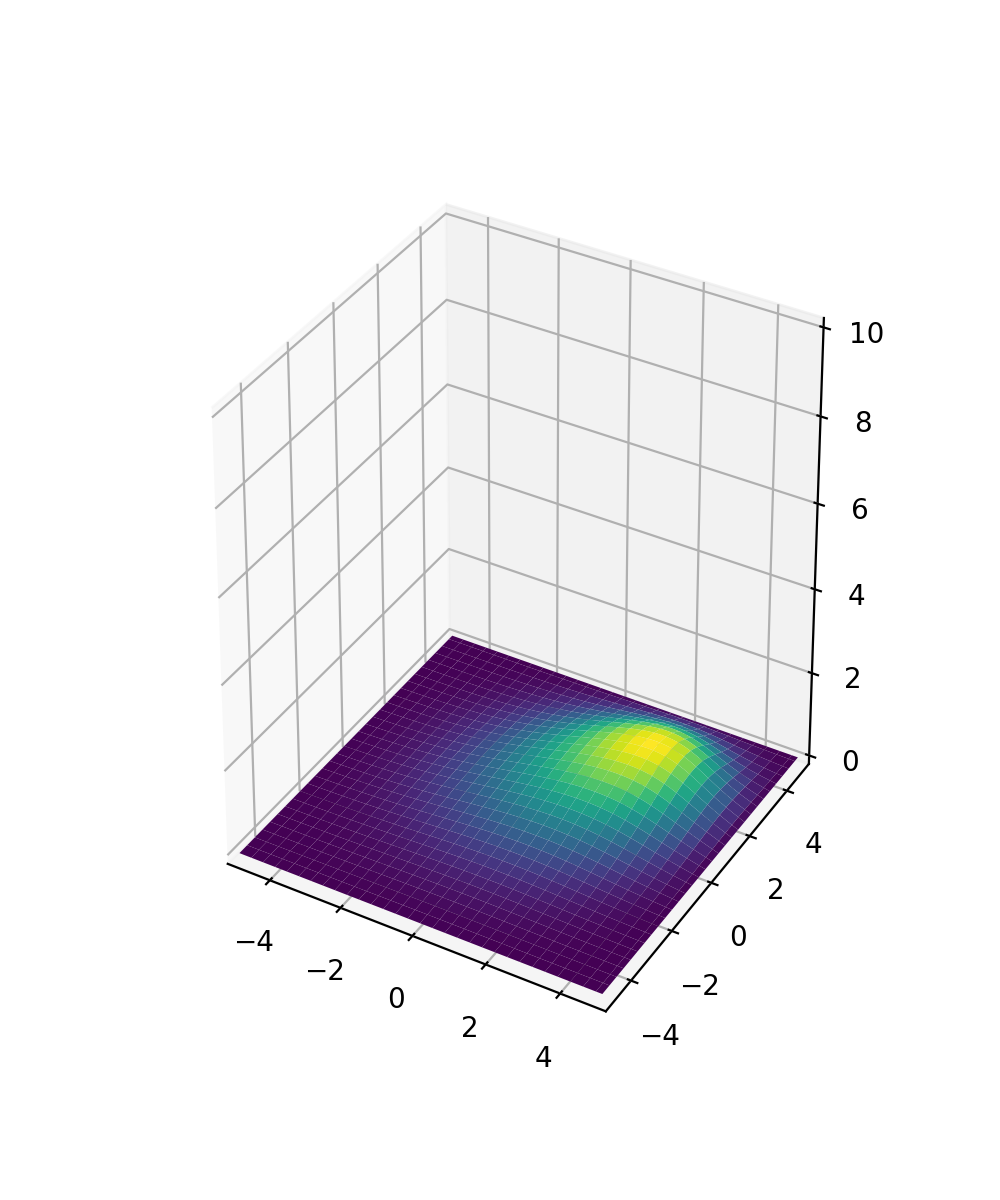

In [18]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(-5,5)
    ax.set_ylim3d(-5,5)
    ax.set_zlim3d(0,10)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,u[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)